# Naive Forecasts

Why do we care about naive forecasts?
They allow us to assess our model quality against a very simple baseline.

In [56]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (12,6)

### Step 1 - Load and prepare the data

In [57]:
# Load the dataset
df = sns.load_dataset('flights')
df.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


In [58]:
# Set the date as index
df['date'] = pd.to_datetime(df.year.astype(str) + "-" + df.month.astype(str))
df.set_index('date', inplace=True)
df.head()

,year,month,passengers
date,,,
1949-01-01,1949,January,112
1949-02-01,1949,February,118
1949-03-01,1949,March,132
1949-04-01,1949,April,129
1949-05-01,1949,May,121


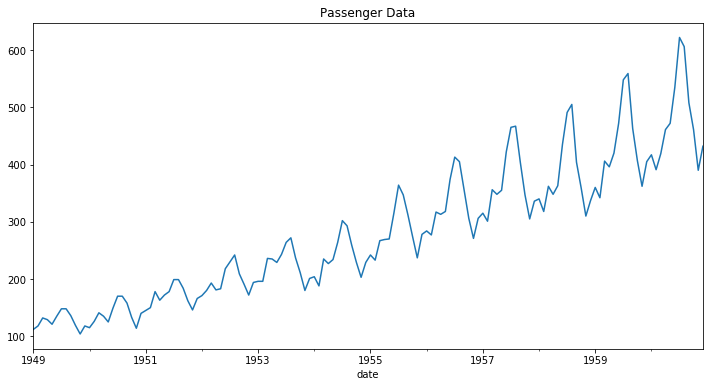

In [59]:
# Plot the data
df['passengers'].plot(title='Passenger Data')

### Step 2 - Split the time series into training and test set

In [60]:
df.tail()

,year,month,passengers
date,,,
1960-08-01,1960,August,606
1960-09-01,1960,September,508
1960-10-01,1960,October,461
1960-11-01,1960,November,390
1960-12-01,1960,December,432


In [61]:
# If we have a DatetimeIndex as our DataFrame.index, we can use that
# To slice by dates

In [62]:
y_train.head()

,year,month,passengers,pct_change,monthly_means,deseasonalized
date,,,,,,
1949-01-01,1,January,112,NaN,0.025356,NaN
1949-02-01,1,February,118,0.053571,-0.005735,0.059306
1949-03-01,1,March,132,0.118644,0.159019,-0.040375
1949-04-01,1,April,129,-0.022727,-0.030992,0.008265
1949-05-01,1,May,121,-0.062016,0.007181,-0.069197


In [63]:
y_train['1949-01':'1949-03']

,year,month,passengers,pct_change,monthly_means,deseasonalized
date,,,,,,
1949-01-01,1,January,112,NaN,0.025356,NaN
1949-02-01,1,February,118,0.053571,-0.005735,0.059306
1949-03-01,1,March,132,0.118644,0.159019,-0.040375


In [64]:
# What happens if we have a column with name '1949'
# y_train['1949'] = 1

In [65]:
y_train = df[:'1959'].copy()
y_test = df['1960'].copy()

In [66]:
# Second thing I wanted to mention is that we split train and test by date

### Step 3 - Detrend your time series data

In [67]:
# Create the pct_change
y_train['pct_change'] = y_train['passengers'].pct_change()
y_train.head()

,year,month,passengers,pct_change
date,,,,
1949-01-01,1949,January,112,NaN
1949-02-01,1949,February,118,0.053571
1949-03-01,1949,March,132,0.118644
1949-04-01,1949,April,129,-0.022727
1949-05-01,1949,May,121,-0.062016


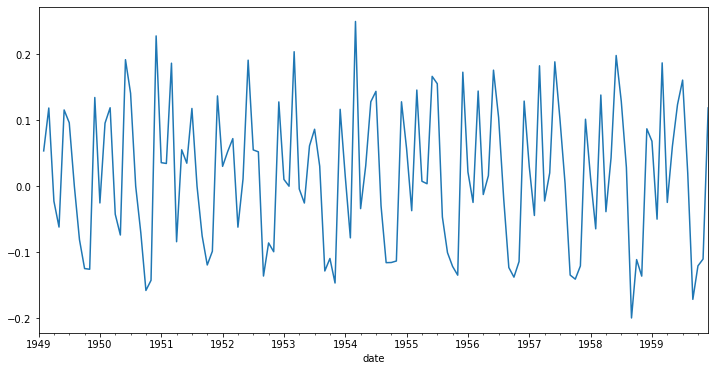

In [68]:
# Plot the pct_change
y_train['pct_change'].plot()

### Step 4 - De-seasonalize the series by subtracting monthly means

In [69]:
# Create monthly means of the pct_change
y_train['monthly_means'] = y_train.groupby('month')['pct_change'].transform('mean')
y_train.head()

,year,month,passengers,pct_change,monthly_means
date,,,,,
1949-01-01,1949,January,112,NaN,0.025356
1949-02-01,1949,February,118,0.053571,-0.005735
1949-03-01,1949,March,132,0.118644,0.159019
1949-04-01,1949,April,129,-0.022727,-0.030992
1949-05-01,1949,May,121,-0.062016,0.007181


In [70]:
# Subtract the monthly mean from the actual values
y_train['deseasonalized'] = y_train['pct_change'] - y_train['monthly_means']
y_train.head()

,year,month,passengers,pct_change,monthly_means,deseasonalized
date,,,,,,
1949-01-01,1949,January,112,NaN,0.025356,NaN
1949-02-01,1949,February,118,0.053571,-0.005735,0.059306
1949-03-01,1949,March,132,0.118644,0.159019,-0.040375
1949-04-01,1949,April,129,-0.022727,-0.030992,0.008265
1949-05-01,1949,May,121,-0.062016,0.007181,-0.069197


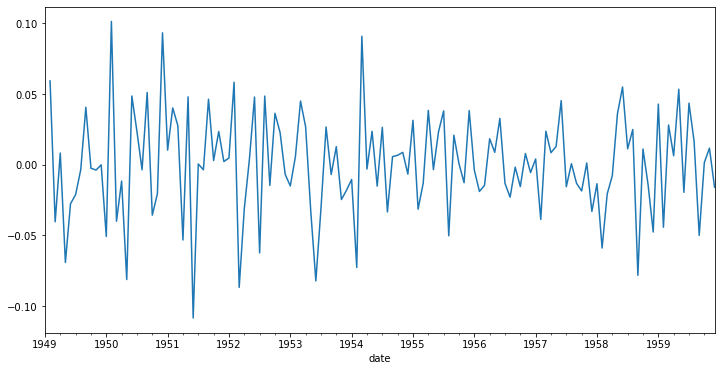

In [71]:
# Plot the deseasonalized data
y_train['deseasonalized'].plot()

# 1) The mean of the time series

In [72]:
y_train['passengers'].mean()

262.49242424242425

In [73]:
# Add the mean value of passengers as prediction for y_test
y_test['y_pred_mean'] = y_train['passengers'].mean()
y_test.head()

,year,month,passengers,y_pred_mean
date,,,,
1960-01-01,1960,January,417,262.492424
1960-02-01,1960,February,391,262.492424
1960-03-01,1960,March,419,262.492424
1960-04-01,1960,April,461,262.492424
1960-05-01,1960,May,472,262.492424


In [74]:
# Define a function that plots the forecast for us
def plot_forecast(y_train, y_test, columns):
    '''
    Plots forecasts of passenger data
    
    Params:
    -------
    y_train: The training data
    y_test: The test data
    columns: Name of the prediction columns form a DataFrame
    
    '''
    # Plot the actual values
    y_train.passengers.plot(label='Training Data')
    y_test.passengers.plot(label=('Test Data'))
    
    # Plot each prediction
    for column in columns:
        y_test[column].plot(label=column)
    
    # General settings
    plt.title('Nr. of Passengers per Month over Time', fontsize=15)
    plt.ylabel('Nr. of Passengers', fontsize=12)
    plt.xlabel('Date', fontsize=12)
    plt.legend()
    # plt.savefig('mean_baseline.png')
    plt.show()

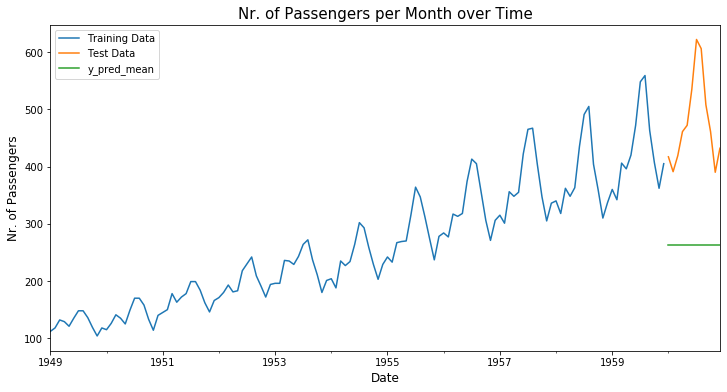

In [75]:
# Plot the forecast
plot_forecast(y_train, y_test, ['y_pred_mean'])

Predicting the mean does not make sense for a time series with trend. What if we instead use the mean pct_change?

# 2) The mean of the detrended time series

In [76]:
# Take the mean percentage change
y_test['y_pred_mean_pct_change'] = y_train['pct_change'].mean()
y_test.head()

,year,month,passengers,y_pred_mean,y_pred_mean_pct_change
date,,,,,
1960-01-01,1960,January,417,262.492424,0.015544
1960-02-01,1960,February,391,262.492424,0.015544
1960-03-01,1960,March,419,262.492424,0.015544
1960-04-01,1960,April,461,262.492424,0.015544
1960-05-01,1960,May,472,262.492424,0.015544


### Convert the prediction back to nr. of passengers

In [77]:
# Add 1 to y_pred_mean_diff
y_test['y_pred_mean_pct_change'] += 1
y_test.head()

,year,month,passengers,y_pred_mean,y_pred_mean_pct_change
date,,,,,
1960-01-01,1960,January,417,262.492424,1.015544
1960-02-01,1960,February,391,262.492424,1.015544
1960-03-01,1960,March,419,262.492424,1.015544
1960-04-01,1960,April,461,262.492424,1.015544
1960-05-01,1960,May,472,262.492424,1.015544


In [78]:
# Take the cumulative product of the series
y_test['y_pred_mean_pct_change'] = np.cumprod(y_test['y_pred_mean_pct_change'])
y_test.head()

,year,month,passengers,y_pred_mean,y_pred_mean_pct_change
date,,,,,
1960-01-01,1960,January,417,262.492424,1.015544
1960-02-01,1960,February,391,262.492424,1.031330
1960-03-01,1960,March,419,262.492424,1.047361
1960-04-01,1960,April,461,262.492424,1.063642
1960-05-01,1960,May,472,262.492424,1.080175


In [79]:
x = 1.015544

In [80]:
x**2

1.031329615936

In [81]:
x**3

1.0473606034861092

In [82]:
# Take the last actual observation as starting point
last_observation = y_train['passengers'][-1]

In [83]:
last_observation

405

In [84]:
y_test['y_pred_mean_pct_change'] *= last_observation
y_test.head()

,year,month,passengers,y_pred_mean,y_pred_mean_pct_change
date,,,,,
1960-01-01,1960,January,417,262.492424,411.295427
1960-02-01,1960,February,391,262.492424,417.688712
1960-03-01,1960,March,419,262.492424,424.181376
1960-04-01,1960,April,461,262.492424,430.774963
1960-05-01,1960,May,472,262.492424,437.471043


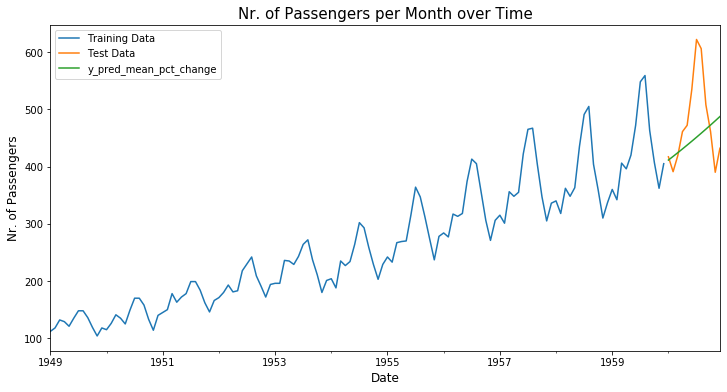

In [85]:
# Plot the forecast
plot_forecast(y_train, y_test, ['y_pred_mean_pct_change'])

# 3) The seasonal means of the time series

In [86]:
# Create a new column with the monthly mean passengers

In [87]:
# Plot the forecast

Again, taking the monthly mean does not make sense in case of a time series with trend. Let's try to use the monthly mean differences instead.

# 4) The seasonal means of the detrended time series

In [88]:
# Take the monthly means of the pct_change
y_train.groupby('month')['pct_change'].mean()

month
January      0.025356
February    -0.005735
March        0.159019
April       -0.030992
May          0.007181
June         0.143349
July         0.117464
August       0.003590
September   -0.121735
October     -0.122518
November    -0.122283
December     0.134727
Name: pct_change, dtype: float64

In [89]:
y_train['monthly_means'][:12].values

array([ 0.02535628, -0.0057347 ,  0.15901935, -0.03099184,  0.00718148,
        0.14334908,  0.11746367,  0.00358992, -0.12173523, -0.12251826,
       -0.12228313,  0.13472655])

In [90]:
len(y_test)

12

In [91]:
# Create a new column containing the monthly mean percentage changes
y_test['y_pred_monthly_mean_pct'] = y_train['monthly_means'][:12].values
y_test.head()

,year,month,passengers,y_pred_mean,y_pred_mean_pct_change,y_pred_monthly_mean_pct
date,,,,,,
1960-01-01,1960,January,417,262.492424,411.295427,0.025356
1960-02-01,1960,February,391,262.492424,417.688712,-0.005735
1960-03-01,1960,March,419,262.492424,424.181376,0.159019
1960-04-01,1960,April,461,262.492424,430.774963,-0.030992
1960-05-01,1960,May,472,262.492424,437.471043,0.007181


In [92]:
# Add 1 to that value
y_test['y_pred_monthly_mean_pct'] += 1
y_test.head()

,year,month,passengers,y_pred_mean,y_pred_mean_pct_change,y_pred_monthly_mean_pct
date,,,,,,
1960-01-01,1960,January,417,262.492424,411.295427,1.025356
1960-02-01,1960,February,391,262.492424,417.688712,0.994265
1960-03-01,1960,March,419,262.492424,424.181376,1.159019
1960-04-01,1960,April,461,262.492424,430.774963,0.969008
1960-05-01,1960,May,472,262.492424,437.471043,1.007181


In [93]:
# Take the cumulative product
y_test['y_pred_monthly_mean_pct'] = np.cumprod(y_test['y_pred_monthly_mean_pct'])
y_test.head()

,year,month,passengers,y_pred_mean,y_pred_mean_pct_change,y_pred_monthly_mean_pct
date,,,,,,
1960-01-01,1960,January,417,262.492424,411.295427,1.025356
1960-02-01,1960,February,391,262.492424,417.688712,1.019476
1960-03-01,1960,March,419,262.492424,424.181376,1.181593
1960-04-01,1960,April,461,262.492424,430.774963,1.144973
1960-05-01,1960,May,472,262.492424,437.471043,1.153195


In [94]:
# Multiply the last observed passenger number
y_test['y_pred_monthly_mean_pct'] *= last_observation
y_test.head()

,year,month,passengers,y_pred_mean,y_pred_mean_pct_change,y_pred_monthly_mean_pct
date,,,,,,
1960-01-01,1960,January,417,262.492424,411.295427,415.269292
1960-02-01,1960,February,391,262.492424,417.688712,412.887846
1960-03-01,1960,March,419,262.492424,424.181376,478.545002
1960-04-01,1960,April,461,262.492424,430.774963,463.714010
1960-05-01,1960,May,472,262.492424,437.471043,467.044165


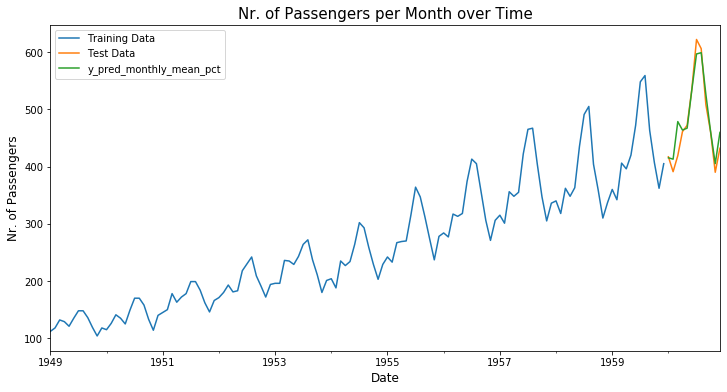

In [95]:
# Plot the forecast
plot_forecast(y_train, y_test, ['y_pred_monthly_mean_pct'])

# 3) Persistence Forecast

In [96]:
y_test['passengers'].shift()

date
1960-01-01      NaN
1960-02-01    417.0
1960-03-01    391.0
1960-04-01    419.0
1960-05-01    461.0
1960-06-01    472.0
1960-07-01    535.0
1960-08-01    622.0
1960-09-01    606.0
1960-10-01    508.0
1960-11-01    461.0
1960-12-01    390.0
Name: passengers, dtype: float64

In [99]:
# Always predict the last observed value
y_test['y_pred_persistence'] = y_test['passengers'].shift()
y_test.head()

,year,month,passengers,y_pred_mean,y_pred_mean_pct_change,y_pred_monthly_mean_pct,y_pred_persistence
date,,,,,,,
1960-01-01,1960,January,417,262.492424,411.295427,415.269292,NaN
1960-02-01,1960,February,391,262.492424,417.688712,412.887846,417.0
1960-03-01,1960,March,419,262.492424,424.181376,478.545002,391.0
1960-04-01,1960,April,461,262.492424,430.774963,463.714010,419.0
1960-05-01,1960,May,472,262.492424,437.471043,467.044165,461.0


In [100]:
y_test.loc['1960-01-01', 'y_pred_persistence'] = last_observation
y_test.head()

,year,month,passengers,y_pred_mean,y_pred_mean_pct_change,y_pred_monthly_mean_pct,y_pred_persistence
date,,,,,,,
1960-01-01,1960,January,417,262.492424,411.295427,415.269292,405.0
1960-02-01,1960,February,391,262.492424,417.688712,412.887846,417.0
1960-03-01,1960,March,419,262.492424,424.181376,478.545002,391.0
1960-04-01,1960,April,461,262.492424,430.774963,463.714010,419.0
1960-05-01,1960,May,472,262.492424,437.471043,467.044165,461.0


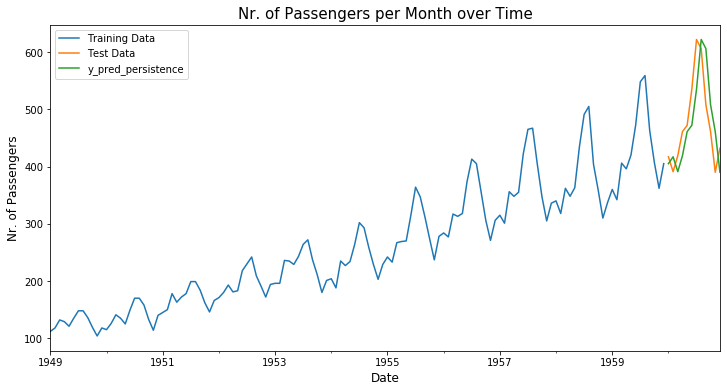

In [102]:
# Plot the prediction
plot_forecast(y_train, y_test, ['y_pred_persistence'])

# 4) Plot all of them together

In [105]:
predictions = y_test.columns[3:]

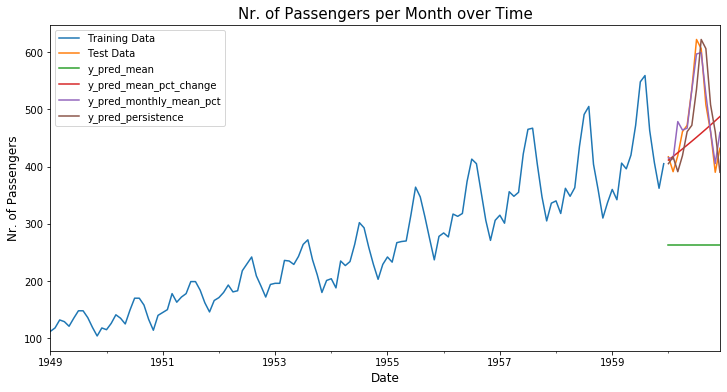

In [106]:
plot_forecast(y_train, y_test, predictions)

# Compare their mean absolute errors

In [107]:
from sklearn.metrics import mean_absolute_error

In [109]:
for prediction in predictions:
    print(f'The mean absolute error of {prediction} is')
    print(f'{mean_absolute_error(y_test["passengers"], y_test[prediction])}')
    print()

The mean absolute error of y_pred_mean is
213.6742424242425

The mean absolute error of y_pred_mean_pct_change is
59.26368663918896

The mean absolute error of y_pred_monthly_mean_pct is
15.456562972559544

The mean absolute error of y_pred_persistence is
45.25

